# Introduction

The objective of this project is to find if a person will claim his/her insurance or not.

Steps:
1.Pre-preprocess the data, update the class lable from True/False to 1,0.
2. Remove the NULL values with mean/median/mode, KNN. If more than 40% data is NULL, better discard the variable.
3. Build a Decision Tree and validate it.
4. Build a Logistic Regression/SVM and validate the model.
5. Report the performance of all the 3 models and choose one algorithm.
6. Take the new test dataset and predict the class values.

In [648]:
import pandas as pd
import numpy as np

In [970]:
data=pd.read_csv(r'C:\Users\gnr04\Desktop\Srikanth\MS\Machine Leanrning and Data Mining\Assignment\CE802_P2_Data\CE802_P2_Data.csv')

In [679]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [650]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,-7.49,True
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,NaN,True
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,-5.74,False
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,NaN,True
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,NaN,False


In [651]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   int64  
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   int64  
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(12), int64(3)
memory usage: 177.4 KB


In [652]:
data['Class']=data['Class'].astype('object')

In [654]:
#Changing the class type from Trues and False to 0s and 1s respectively which could be confusing, so lets make True,False as 1,0.
data['Class']= pd.factorize(data['Class'])[0]

In [690]:
def lable(x):
    if x==0:
        return 1
    else:
        return 0

In [699]:
#True and False is 1,0 respectively
data['Class']=data['Class'].map(lable)

In [700]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,1
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,1
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,0
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,1
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,0


In [974]:
#There are 809 False and 691 Trues and 
data['Class'].value_counts()

False    809
True     691
Name: Class, dtype: int64

In [973]:
#We have 750 NaNs in the F15 feature.  
data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [706]:
#50% of the feature values are missing, there is no point in doing any kind of imputation, its better to remove the feature.
(750/len(data['F15'])*100)

50.0

### Missing Value Imputation
#### Its is important to check the Standard Deviation of the feature before imputation. The aim is to have a closer SD after imputation .

In [659]:
#The standard deviation before the impuation is close to 1
data['F15'].std()

1.0051168089107672

In [952]:
# Median Imputation
data['F15'].fillna(data['F15'].median(),axis=0).std()

0.7104963992715247

In [202]:
# Mean Imputation
data['F15'].fillna(data['F15'].mean(),axis=0).std()

0.710487805566723

In [210]:
# Previous value impuation
data['F15'].fillna(method ='pad').std()

1.0066972973646222

In [228]:
# Using the 'bfill'(next value) imputer is proves to be the best since its SD is close to the actual.
data['F15'].fillna(method ='bfill').std()

1.0045411402792603

In [661]:
del data['F15'] #I have decided to remove this feature as this could take a toll on model's performance.

In [707]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,1
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,1
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,0
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,1
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,0


## Decision Tree
A Decision Tree doesn't need Feature Scaling since it is not impacted by the variance in the data. So no Standardization and Normalization. It is generally useful, when you are solving a system of equations, least squares, etc, where you can have serious issues due to rounding errors. In decision tree, you are just comparing stuff and branching down the tree, so normalization would not help.

In [708]:
X=data.drop(['Class'], axis=1)

In [709]:
y=data['Class']

In [710]:
X.shape,y.shape

((1500, 14), (1500,))

In [711]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [712]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelBinarizer

In [960]:
# It is very important to find the optimal parameters before applying any algorithm on the data.
def tuning(y_train,y_test,X_train,X_test): # Defining a function
    lb = LabelBinarizer() 
    y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
    y_test= np.array([number[0] for number in lb.fit_transform(y_test)])


    Dtree =DecisionTreeClassifier(class_weight='balanced') # class_weight is set to 'balanced' because data is imbalanced. We can also give a dict of values if we want.

    param = {'max_depth':[1,2,3,4,5,6,7,8,9],'min_samples_split':[10,13,15,18,20,21,22,23,24,25,28,31,35,50],
            'criterion':['gini', 'entropy']}
    
    randomDtree = RandomizedSearchCV(Dtree,param,cv=5,verbose=1,scoring= 'f1',n_jobs=-1) # Since all data is imbalanced, accuracy can't be used as scoring metric, so we can use metrics like precision, recall, f1 or roc_auc.
    randomDtree.fit(X_train,y_train)
    print("Best HyperParameter: ",randomDtree.best_params_) # We get the best C and penality.
    print("Accuracy Obtained: %.2f%%"%(randomDtree.best_score_*100))

In [717]:
tuning(y_train,y_test,X_train,X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best HyperParameter:  {'min_samples_split': 15, 'max_depth': 6, 'criterion': 'gini'}
Accuracy Obtained: 74.92%


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


Using Random Search, we can see that out model has given a high Minimum Sample Split and a low MaxDepth to avoid overfitting.

In [718]:
lb = LabelBinarizer() 

y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
y_test= np.array([number[0] for number in lb.fit_transform(y_test)])

Dtree_clf = DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_split=15, class_weight='balanced') # Using the best parameters obtained by Randomsearch
Dtree_clf.fit(X_train,y_train.tolist())
Dtree_pred = Dtree_clf.predict(X_test)


Accuracy on test set: 75.667%
Precision on test set: 0.730
Recall on test set: 0.690
F1-Score on test set: 0.709


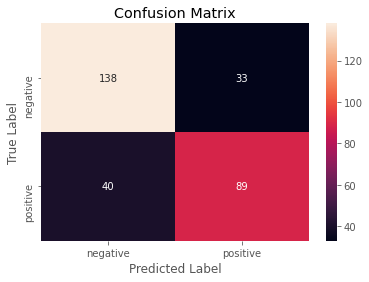

In [720]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, Dtree_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, Dtree_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, Dtree_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, Dtree_pred)))

cm = confusion_matrix(y_test, Dtree_pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Now lets try to build a Decision Tree model with 'F15' included(with imputation) 

In [ ]:
data=pd.read_csv(r'C:\Users\gnr04\Desktop\Srikanth\MS\Machine Leanrning and Data Mining\Assignment\CE802_P2_Data\CE802_P2_Data.csv')

In [ ]:
data1=data

In [ ]:
data1['F15']=data['F15'].fillna(data['F15'].median(),axis=0)

In [ ]:
data1.head()

In [ ]:
X1=data1.drop(['Class'], axis=1)

In [ ]:
y1=data1['Class']

In [958]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [962]:
tuning(y_train1,y_test1,X_train1,X_test1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best HyperParameter:  {'min_samples_split': 31, 'max_depth': 6, 'criterion': 'entropy'}
Accuracy Obtained: 77.66%


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


Accuracy on test set: 80.667%
Precision on test set: 0.775
Recall on test set: 0.775
F1-Score on test set: 0.775


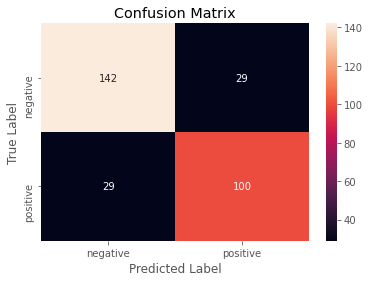

In [964]:
lb = LabelBinarizer() 

y_train1 = np.array([number[0] for number in lb.fit_transform(y_train1)]) 
y_test1= np.array([number[0] for number in lb.fit_transform(y_test1)])

Dtree_clf = DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_split=31, class_weight='balanced') # Using the best parameters obtained by Randomsearch
Dtree_clf.fit(X_train1,y_train1.tolist())
Dtree_pred = Dtree_clf.predict(X_test1)

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test1, Dtree_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test1, Dtree_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test1, Dtree_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test1, Dtree_pred)))

cm = confusion_matrix(y_test1, Dtree_pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Logistic Regression

In [721]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

X_train=StandardScaler(with_mean=False).fit_transform(X_train)

In [722]:
X_train.shape

(1200, 14)

In [723]:
X_test=StandardScaler(with_mean=False).fit_transform(X_test)
X_test.shape

(300, 14)

In [724]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer() 
y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
y_test= np.array([number[0] for number in lb.fit_transform(y_test)])


lr = LogisticRegression(class_weight='balanced') # class_weight is set to 'balanced' because data is imbalanced. We can also give a dict of values if we want.
#params we need to try on classifier
param = {'C':[50,10,1,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001], # List of 'C' values. 
             'penalty':['l1','l2']} # Both the regularization terms.
grid_lr = GridSearchCV(lr,param,cv=5,verbose=1,scoring= 'f1',n_jobs=-1) # Since all data is imbalanced, accuracy can't be used as scoring metric, so we can use metrics like precision, recall, f1 or roc_auc.
grid_lr.fit(X_train,y_train)
print("Best HyperParameter: ",grid_lr.best_params_) # We get the best C and penality.
print("Best Accuracy: %.2f%%"%(grid_lr.best_score_*100))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    2.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
C:\Users\gnr04\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best HyperParameter:  {'C': 50, 'penalty': 'l2'}
Best Accuracy: 82.97%


C:\Users\gnr04\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on test set: 77.333%
Precision on test set: 0.667
Recall on test set: 0.946
F1-Score on test set: 0.782


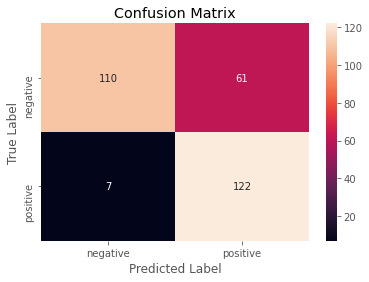

In [805]:
#Testing Accuracy on Test data
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
y_test= np.array([number[0] for number in lb.fit_transform(y_test)])

lr_clf = LogisticRegression(C= 50, penalty= 'l2') # Using the best parameters obtained by grid search
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, lr_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, lr_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, lr_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, lr_pred)))

cm = confusion_matrix(y_test, lr_pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Now lets try Logistic Regression with F15 feature

In [975]:
X_train1=StandardScaler(with_mean=False).fit_transform(X_train1)

In [976]:
X_test1=StandardScaler(with_mean=False).fit_transform(X_test1)

In [977]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer() 
y_train1 = np.array([number[0] for number in lb.fit_transform(y_train1)]) 
y_test1= np.array([number[0] for number in lb.fit_transform(y_test1)])


lr = LogisticRegression(class_weight='balanced') # class_weight is set to 'balanced' because data is imbalanced. We can also give a dict of values if we want.
#params we need to try on classifier
param = {'C':[50,10,1,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001], # List of 'C' values. 
             'penalty':['l1','l2']} # Both the regularization terms.
grid_lr = GridSearchCV(lr,param,cv=5,verbose=1,scoring= 'f1',n_jobs=-1) # Since all data is imbalanced, accuracy can't be used as scoring metric, so we can use metrics like precision, recall, f1 or roc_auc.
grid_lr.fit(X_train1,y_train1)
print("Best HyperParameter: ",grid_lr.best_params_) # We get the best C and penality.
print("Best Accuracy: %.2f%%"%(grid_lr.best_score_*100))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    3.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished


Best HyperParameter:  {'C': 50, 'penalty': 'l2'}
Best Accuracy: 85.47%


C:\Users\gnr04\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on test set: 83.667%
Precision on test set: 0.753
Recall on test set: 0.922
F1-Score on test set: 0.829


C:\Users\gnr04\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


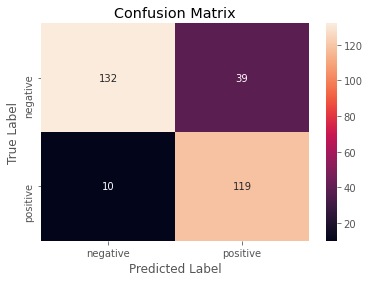

In [978]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train1 = np.array([number[0] for number in lb.fit_transform(y_train1)]) 
y_test1= np.array([number[0] for number in lb.fit_transform(y_test1)])

lr_clf = LogisticRegression(C= 50, penalty= 'l2') # Using the best parameters obtained by grid search
lr_clf.fit(X_train1,y_train1)
lr_pred = lr_clf.predict(X_test1)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test1, lr_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test1, lr_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test1, lr_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test1, lr_pred)))

cm = confusion_matrix(y_test1, lr_pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## SVM 

In [726]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC

In [729]:
X_train=StandardScaler(with_mean=False).fit_transform(X_train)

In [730]:
X_test=StandardScaler(with_mean=False).fit_transform(X_test)

In [1008]:
# It is very important to find the optimal parameters before applying any algorithm on the data.
def tuning(y_train,y_test,x_train,x_test): # Defining a function
    lb = LabelBinarizer() 
    y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
    y_test= np.array([number[0] for number in lb.fit_transform(y_test)])


    svm_rbf =SVC(kernel='rbf',class_weight='balanced') # class_weight is set to 'balanced' because data is imbalanced. We can also give a dict of values if we want.

    param = {'C':[0.0001,0.001,0.05,0.03,0.01,0.5,0.3,0.1,1,3,5,7,10,15,17,20], # List of 'alpha' values. 
             'gamma':[0.0005,0.0001,0.005,0.001,0.05,0.01,0.5,0.3,0.1]} # the regularization terms.
    grid_svm_rbf = RandomizedSearchCV(svm_rbf,param,cv=5,verbose=1,scoring= 'f1_weighted',n_jobs=-1) # Since all data is imbalanced, accuracy can't be used as scoring metric, so we can use metrics like precision, recall, f1 or roc_auc.
    grid_svm_rbf.fit(X_train,y_train)
    print("Best HyperParameter: ",grid_svm_rbf.best_params_) # We get the best C and penality.
    print("Accuracy Obtained: %.2f%%"%(grid_svm_rbf.best_score_*100))

In [1030]:
tuning(y_train,y_test,X_train,X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best HyperParameter:  {'gamma': 0.1, 'C': 10}
Accuracy Obtained: 85.84%


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished


Accuracy on test set: 80.667%
Precision on test set: 0.710
Recall on test set: 0.930
F1-Score on test set: 0.805


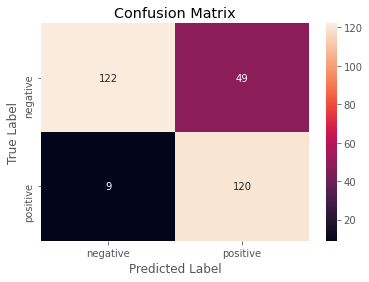

In [1031]:
lb = LabelBinarizer() 
y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
y_test= np.array([number[0] for number in lb.fit_transform(y_test)])

svm_clf = SVC( C= 10,gamma=0.1,class_weight='balanced') # Using the best parameters obtained by grid search
svm_clf.fit(X_train,y_train)
svm_pred = svm_clf.predict(X_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, svm_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, svm_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, svm_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, svm_pred)))

cm = confusion_matrix(y_test, svm_pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### SVM with missing value Imputation F15

In [1046]:
tuning(y_train1,y_test1,X_train1,X_test1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best HyperParameter:  {'gamma': 0.1, 'C': 15}
Accuracy Obtained: 87.00%


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished


Accuracy on test set: 86.000%
Precision on test set: 0.777
Recall on test set: 0.946
F1-Score on test set: 0.853


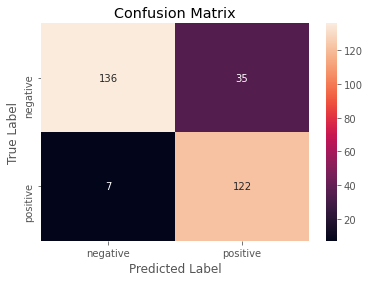

In [1047]:
lb = LabelBinarizer() 
y_train1 = np.array([number[0] for number in lb.fit_transform(y_train1)]) 
y_test1= np.array([number[0] for number in lb.fit_transform(y_test1)])

svm_clf1 = SVC( C= 15,gamma=0.1,class_weight='balanced') # Using the best parameters obtained by grid search
svm_clf1.fit(X_train1,y_train1)
svm_pred1 = svm_clf1.predict(X_test1)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test1, svm_pred1)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test1, svm_pred1)))
print("Recall on test set: %0.3f"%(recall_score(y_test1, svm_pred1)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test1, svm_pred1)))

cm = confusion_matrix(y_test1, svm_pred1)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Models Summary
I am choosing (SVM RBF) to make the prediction on the test(CE802_P3_Test.csv) file. Why?? Because SVM model has an overall good Recall(less False Negative Rate) and Accuracy scores if compared to that of remaining two models.

The below table has the results of models without F15 feature. I have discarded that feature. 

In [1032]:
# The below table has the values of algorithms without 'F15'.

from tabulate import tabulate 

values = {'Algorithm':['Decision Tree', 'Logistic Regression', 'Support Vector Machine RBF'], 
        'Accuracy':['75.66%','77.333%' ,'81%'], 
        'Precision':['0.73', '0.667', '0.71'],
        'Recall':['0.69','0.946','0.93'],
        'F1-Score':['0.709','0.782','0.805']
       } 

df1 = pd.DataFrame(values) 
  
# displaying the DataFrame 
print(tabulate(df1, headers = 'keys', tablefmt = 'psql')) 


+----+----------------------------+------------+-------------+----------+------------+
|    | Algorithm                  | Accuracy   |   Precision |   Recall |   F1-Score |
|----+----------------------------+------------+-------------+----------+------------|
|  0 | Decision Tree              | 75.66%     |       0.73  |    0.69  |      0.709 |
|  1 | Logistic Regression        | 77.333%    |       0.667 |    0.946 |      0.782 |
|  2 | Support Vector Machine RBF | 81%        |       0.71  |    0.93  |      0.805 |
+----+----------------------------+------------+-------------+----------+------------+


#### Now lets see the results obtained after adding F15 and imputing the missing values.

In [1048]:
values1 = {'Algorithm':['Decision Tree', 'Logistic Regression', 'Support Vector Machine RBF'], 
        'Accuracy':['80.667%','83.667%' ,'86%'], 
        'Precision':['0.775', '0.753', '0.777'],
        'Recall':['0.775','0.922','0.946'],
        'F1-Score':['0.775','0.829','0.853']
       } 

df2 = pd.DataFrame(values1) 
  
# displaying the DataFrame 
print(tabulate(df2, headers = 'keys', tablefmt = 'psql')) 

+----+----------------------------+------------+-------------+----------+------------+
|    | Algorithm                  | Accuracy   |   Precision |   Recall |   F1-Score |
|----+----------------------------+------------+-------------+----------+------------|
|  0 | Decision Tree              | 80.667%    |       0.775 |    0.775 |      0.775 |
|  1 | Logistic Regression        | 83.667%    |       0.753 |    0.922 |      0.829 |
|  2 | Support Vector Machine RBF | 86%        |       0.777 |    0.946 |      0.853 |
+----+----------------------------+------------+-------------+----------+------------+


## 2(b) Prediction on a hold-out test set. I am using SVM to test the model.

In [1049]:
test=pd.read_csv(r'C:\Users\gnr04\Desktop\Srikanth\MS\Machine Leanrning and Data Mining\Assignment\CE802_P2_Data\CE802_P2_test.csv')

In [1050]:
# We have to remove the 'F15','Class' feature from the test set because it doesn't exist in the train testset.
del test['F15']
del test['Class']

In [1002]:
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
0,-4,765,-3.72,26.40,30,5.15,18.66,31.06,-4.80,15.18,-5.05,-6.56,-766.22,-1.98
1,-3,3,-7.10,1.20,3,0.36,-119.34,20.00,6.39,19.92,-5.29,0.32,-524.22,2.12
2,-4,735,-1.70,14.50,30,6.50,183.66,37.36,-11.88,11.22,-7.79,-9.64,-776.22,-3.88
3,-14,90,-2.55,13.30,30,7.95,-236.34,32.06,-3.09,15.86,-4.33,-8.76,-916.22,-3.41
4,-1,174,-7.63,3.74,3,0.94,-143.34,19.58,11.67,19.62,-7.63,1.12,-506.22,3.08


In [1051]:
#Checking for NUll values to impute, none found.
test.isnull().sum()

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
dtype: int64

In [1052]:
##Data Standardizing
test_std=StandardScaler(with_mean=False).fit_transform(test)

In [1057]:
svm_pred = svm_clf.predict(test_std)

In [1058]:
svm_pred

array([0, 0, 0, ..., 0, 1, 0])

In [1059]:
(unique, counts) = np.unique(svm_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T

In [1060]:
frequencies

array([[   0, 1076],
       [   1,  424]], dtype=int64)

In [1061]:
df=pd.DataFrame(svm_pred)

In [1062]:
df.columns=['Class']

In [1063]:
test['Class']=df['Class'].values

In [1064]:
test['Class'].value_counts()

0    1076
1     424
Name: Class, dtype: int64

In [1065]:
test.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,-4,765,-3.72,26.40,30,5.15,18.66,31.06,-4.80,15.18,-5.05,-6.56,-766.22,-1.98,0
1,-3,3,-7.10,1.20,3,0.36,-119.34,20.00,6.39,19.92,-5.29,0.32,-524.22,2.12,0
2,-4,735,-1.70,14.50,30,6.50,183.66,37.36,-11.88,11.22,-7.79,-9.64,-776.22,-3.88,0
3,-14,90,-2.55,13.30,30,7.95,-236.34,32.06,-3.09,15.86,-4.33,-8.76,-916.22,-3.41,0
4,-1,174,-7.63,3.74,3,0.94,-143.34,19.58,11.67,19.62,-7.63,1.12,-506.22,3.08,0
5,-1,24,-6.67,4.16,3,0.86,-68.34,19.70,7.14,19.32,-5.62,-0.54,-482.22,1.50,1
6,-4,1155,-1.76,20.10,30,8.25,168.66,33.36,-11.61,12.30,-6.43,-10.34,-576.22,-4.13,0
7,-3,6,-7.29,3.44,3,0.12,-125.34,19.54,4.74,21.30,-4.99,0.64,-542.22,1.46,0
8,-14,945,-1.20,12.60,30,7.80,108.66,36.36,-12.51,12.72,-6.62,-10.30,-546.22,-3.74,0
9,-1,24,-8.46,1.20,3,0.36,-110.34,20.14,5.31,19.88,-5.76,1.04,-510.22,2.73,0


### Testing with feature F15

In [1066]:
test1=pd.read_csv(r'C:\Users\gnr04\Desktop\Srikanth\MS\Machine Leanrning and Data Mining\Assignment\CE802_P2_Data\CE802_P2_test.csv')

In [1067]:
del test1['Class']

In [1068]:
test1['F15']=data['F15'].fillna(data['F15'].median(),axis=0)

In [1069]:
##Data Standardizing
test_std1=StandardScaler(with_mean=False).fit_transform(test1)

In [1087]:
svm_pred1 = svm_clf1.predict(test_std1)

In [1089]:
(unique, counts) = np.unique(svm_pred1, return_counts=True)
frequencies = np.asarray((unique, counts)).T

In [1091]:
frequencies

array([[   0, 1037],
       [   1,  463]], dtype=int64)

In [1096]:
df1=pd.DataFrame(svm_pred1)
df1.columns=['Class1']
test['Class1']=df1['Class1'].values

In [1104]:
test['Class1'].value_counts()

0    1037
1     463
Name: Class1, dtype: int64

In [1105]:
test['Class'].value_counts()

0    1076
1     424
Name: Class, dtype: int64

In [1106]:
# The 'Class' is the model's result which is built without 'F15' feature and the 'Class1' is the model's result built with 'F15' feature. 
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class,Class1
0,-4,765,-3.72,26.40,30,5.15,18.66,31.06,-4.80,15.18,-5.05,-6.56,-766.22,-1.98,0,0
1,-3,3,-7.10,1.20,3,0.36,-119.34,20.00,6.39,19.92,-5.29,0.32,-524.22,2.12,0,0
2,-4,735,-1.70,14.50,30,6.50,183.66,37.36,-11.88,11.22,-7.79,-9.64,-776.22,-3.88,0,0
3,-14,90,-2.55,13.30,30,7.95,-236.34,32.06,-3.09,15.86,-4.33,-8.76,-916.22,-3.41,0,0
4,-1,174,-7.63,3.74,3,0.94,-143.34,19.58,11.67,19.62,-7.63,1.12,-506.22,3.08,0,0


In [1107]:
CE802_P2_TestNew=test.to_csv(r'C:\Users\gnr04\Desktop\Srikanth\MS\Machine Leanrning and Data Mining\Assignment\CE802_P3_Test2classes.csv')